<a href="https://colab.research.google.com/github/NikhitapHegde/final_year_project/blob/main/parkin_accuracies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kmader_parkinsons_drawings_path = kagglehub.dataset_download('kmader/parkinsons-drawings')

print('Data source import complete.')



Data source import complete.


In [2]:
!pip install tensorflow

In [3]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()


Saving archive (5).zip to archive (5).zip


In [5]:
import zipfile
import os

# Define the name of the uploaded ZIP file
zip_file_name = 'archive (5).zip'  # Change this if your file has a different name

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

print("Files extracted to: extracted_files/")


Files extracted to: extracted_files/


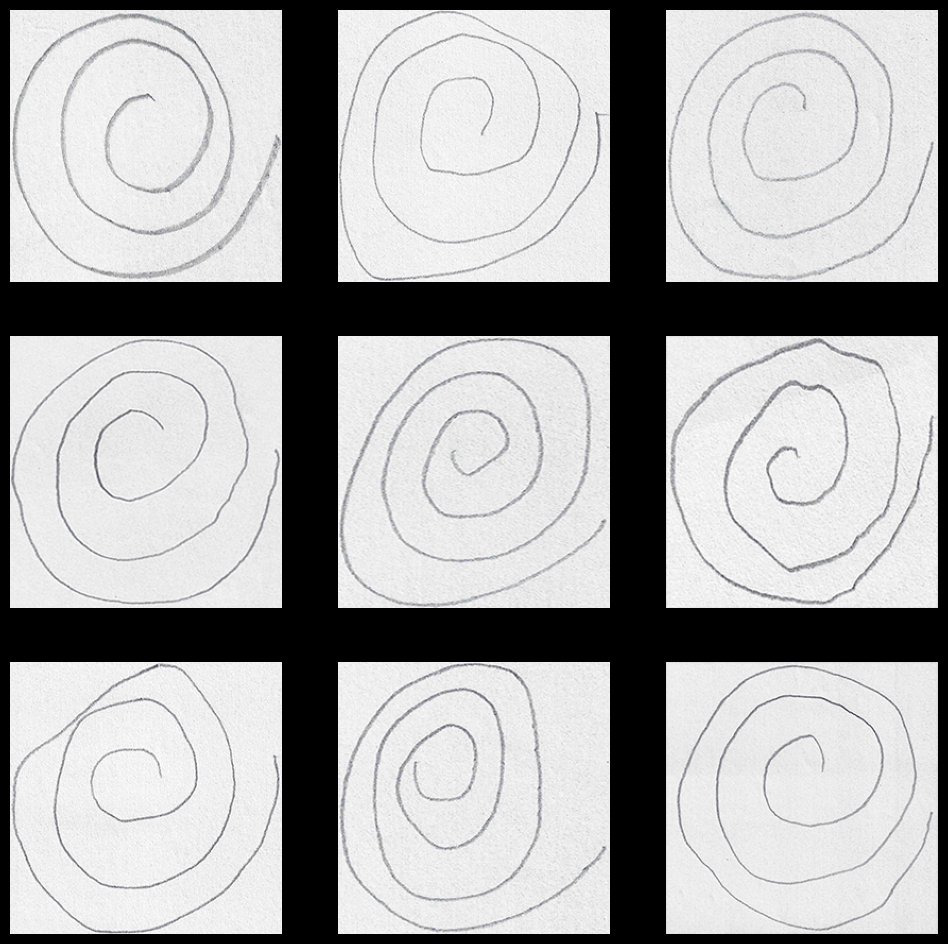

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'spiral' training images
spiral_training_dir = os.path.join(extracted_dir, 'drawings', 'spiral', 'training', 'healthy')

# Get a list of image files in the 'healthy' directory
healthy_images = os.listdir(spiral_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the healthy images directory
    img_path = os.path.join(spiral_training_dir, healthy_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


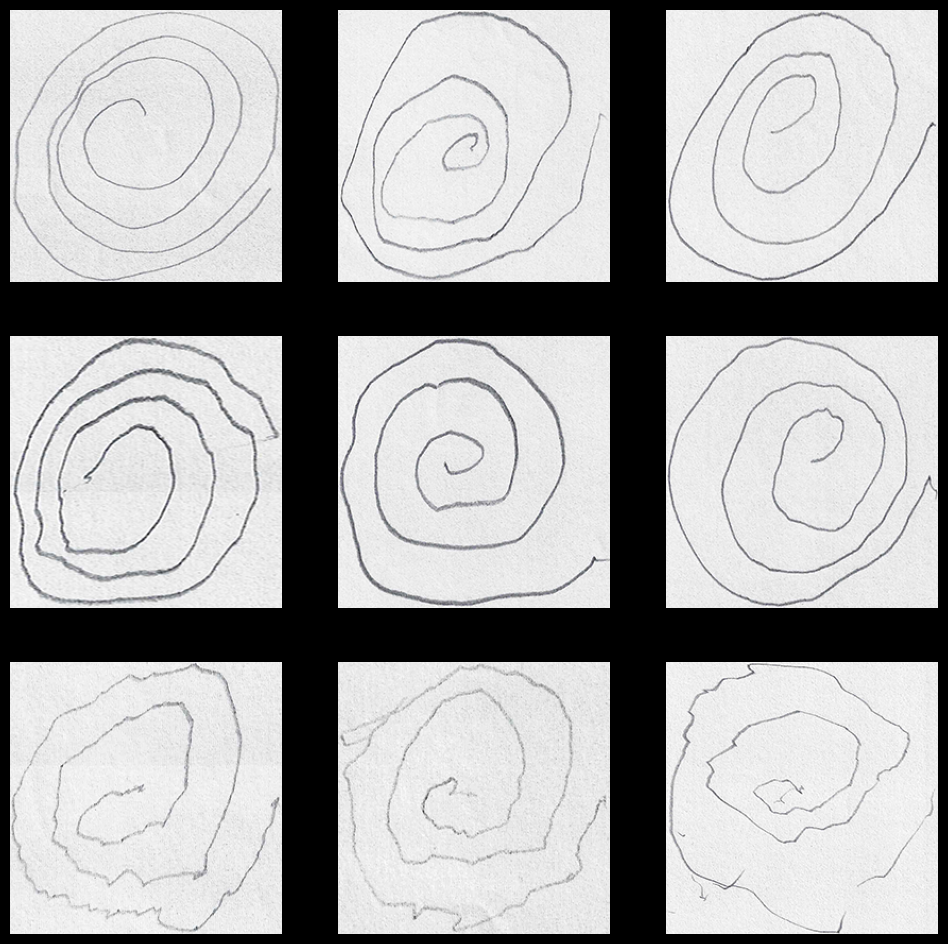

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'parkinson' training images
parkinson_training_dir = os.path.join(extracted_dir, 'drawings', 'spiral', 'training', 'parkinson')

# Get a list of image files in the 'parkinson' directory
parkinson_images = os.listdir(parkinson_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the parkinson images directory
    img_path = os.path.join(parkinson_training_dir, parkinson_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


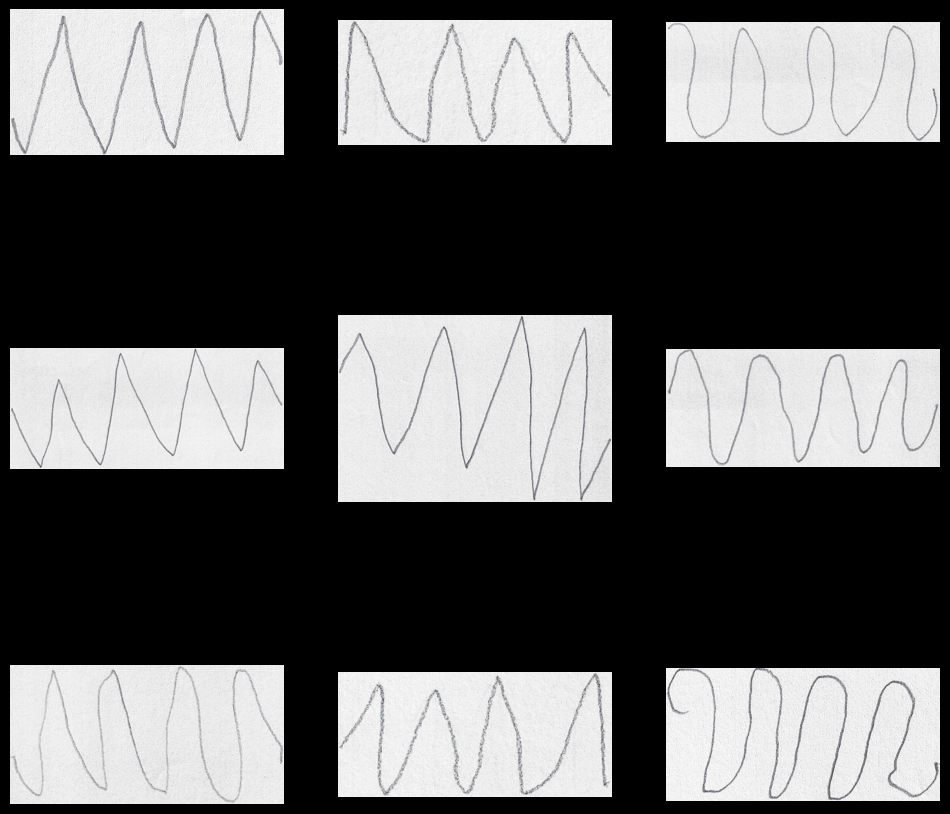

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'healthy' training images in the 'wave' directory
healthy_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'healthy')

# Get a list of image files in the 'healthy' folder
healthy_images = os.listdir(healthy_wave_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the healthy images directory
    img_path = os.path.join(healthy_wave_training_dir, healthy_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


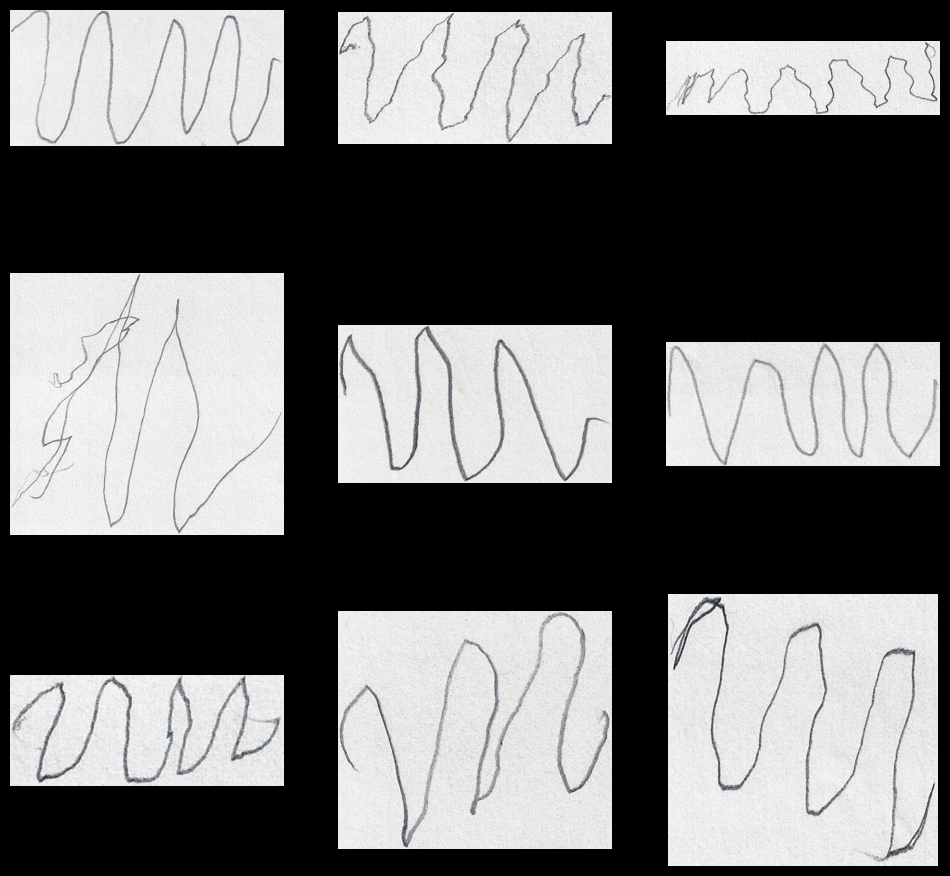

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'parkinson' training images in the 'wave' directory
parkinson_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'parkinson')

# Get a list of image files in the 'parkinson' folder
parkinson_images = os.listdir(parkinson_wave_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the parkinson images directory
    img_path = os.path.join(parkinson_wave_training_dir, parkinson_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


In [10]:
import os

# Define the path to the extracted files directory
extracted_files_dir = 'extracted_files'  # Update this with the path to your extracted files

# Function to count the total number of image files in a directory and its subdirectories
def count_total_images(directory):
    image_count = 0
    for root, _, files in os.walk(directory):
        # Count image files with the given extensions
        image_count += len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
    return image_count

# Count total images in the extracted files directory
total_image_count = count_total_images(extracted_files_dir)

# Print the total number of images
print(f"Total number of images in 'extracted_files' directory: {total_image_count}")


Total number of images in 'extracted_files' directory: 408


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms
from PIL import Image
import os
from sklearn.metrics import classification_report

# Define device (CUDA or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define path to the dataset
extracted_dir = 'extracted_files'
parkinson_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'parkinson')
healthy_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'healthy')

# Data Transformation with Augmentation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Custom Dataset for Parkinson's and Healthy images
class ParkinsonDataset(Dataset):
    def __init__(self, parkinson_dir, healthy_dir, transform=None):
        self.parkinson_images = [os.path.join(parkinson_dir, fname) for fname in os.listdir(parkinson_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.healthy_images = [os.path.join(healthy_dir, fname) for fname in os.listdir(healthy_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.parkinson_images) + len(self.healthy_images)

    def __getitem__(self, idx):
        if idx < len(self.parkinson_images):
            img_path = self.parkinson_images[idx]
            label = 1  # Parkinson label
        else:
            img_path = self.healthy_images[idx - len(self.parkinson_images)]
            label = 0  # Healthy label

        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, label

# Create the dataset
dataset = ParkinsonDataset(parkinson_wave_training_dir, healthy_wave_training_dir, transform)

# Split into training and testing datasets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)
class_weights = torch.tensor([1.0, 1.0]).to(device)  # Adjust weights if needed
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the model parameters

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

# Evaluate the model
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

final_accuracy = (correct / total) * 100
print(f"Final Accuracy on the test set: {final_accuracy}%")
print(classification_report(all_labels, all_predictions, target_names=["Healthy", "Parkinson"]))


Epoch [1/20], Loss: 0.7040, Accuracy: 40.35%
Epoch [2/20], Loss: 0.6945, Accuracy: 52.63%
Epoch [3/20], Loss: 0.6992, Accuracy: 38.60%
Epoch [4/20], Loss: 0.6967, Accuracy: 43.86%
Epoch [5/20], Loss: 0.6935, Accuracy: 50.88%
Epoch [6/20], Loss: 0.6934, Accuracy: 54.39%
Epoch [7/20], Loss: 0.6963, Accuracy: 45.61%
Epoch [8/20], Loss: 0.6905, Accuracy: 52.63%
Epoch [9/20], Loss: 0.6886, Accuracy: 56.14%
Epoch [10/20], Loss: 0.6954, Accuracy: 43.86%
Epoch [11/20], Loss: 0.6928, Accuracy: 54.39%
Epoch [12/20], Loss: 0.6969, Accuracy: 49.12%
Epoch [13/20], Loss: 0.6911, Accuracy: 43.86%
Epoch [14/20], Loss: 0.6891, Accuracy: 50.88%
Epoch [15/20], Loss: 0.6850, Accuracy: 56.14%
Epoch [16/20], Loss: 0.6983, Accuracy: 42.11%
Epoch [17/20], Loss: 0.6953, Accuracy: 50.88%
Epoch [18/20], Loss: 0.6918, Accuracy: 52.63%
Epoch [19/20], Loss: 0.6977, Accuracy: 45.61%
Epoch [20/20], Loss: 0.6859, Accuracy: 59.65%
Final Accuracy on the test set: 46.666666666666664%
              precision    recall  f1

In [12]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [13]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(

            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()

        )

    def forward(self, input):
        return self.main(input)

In [14]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
from tqdm import tqdm

manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
dataroot ='extracted_files/brain_tumor_dataset'

workers = 2
batch_size = 64
image_size = 64
nc = 3
nz = 100
ngf = 64
ndf = 64
num_epochs = 2500
lr = 0.0002
beta1 = 0.5
ngpu = 1

Random Seed:  999


In [15]:
import torch
import torch.nn as nn

# ... (rest of your imports and code)

# Define device (CUDA or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ... (rest of your code)

netG = Generator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
netG.apply(weights_init)

print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [16]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(

            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [17]:
netD = Discriminator(ngpu).to(device)
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
netD.apply(weights_init)

print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [18]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [19]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import torchvision.utils as vutils

# Hyperparameters
dataroot = "extracted_files/drawings/spiral/training/healthy"
workers = 2
batch_size = 64
image_size = 64
nc = 3  # Number of channels in the image (RGB, so 3)
nz = 100  # Latent vector size
ngf = 64  # Number of generator feature maps
ndf = 64  # Number of discriminator feature maps
num_epochs = 500
lr = 0.0002
beta1 = 0.5
ngpu = 1
img_list = []
G_losses = []
D_losses = []
iters = 0
real_label = 1
fake_label = 0

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.png') or img.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# Image transform for data loading
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Dataset and dataloader
dataset = CustomImageDataset(root_dir=dataroot, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=workers)

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Create the generator and discriminator
netG = Generator().to(device)
netD = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# Create fixed noise for generating images at each epoch
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Training Loop
print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()
        real_cpu = data.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

        # Forward pass through Discriminator
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Update Discriminator with fake images
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update Generator
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        iters += 1

        # Print loss stats
        if iters % 50 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}]\t'
                  f'Loss_D: {errD.item():.4f}\tLoss_G: {errG.item():.4f}\t'
                  f'D(x): {D_x:.4f}\tD(G(z)): {D_G_z1:.4f}/{D_G_z2:.4f}')

        # Save losses for plotting
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Save images at fixed epoch intervals (e.g., after 300 epochs)
        if epoch == 300:
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

            output_path = 'extracted_files/DCGAN_results_epoch_300/yes/'
            if not os.path.exists(output_path):
                os.makedirs(output_path)

            for i in range(64):
                vutils.save_image(fake[i], f'{output_path}/fake_samples_epoch_300_{i}.png', normalize=True)

    # Save models after each epoch
    torch.save(netG.state_dict(), f'netG_epoch_{epoch}.pth')
    torch.save(netD.state_dict(), f'netD_epoch_{epoch}.pth')

print("Training finished!")


Starting Training Loop...
[49/500][0/1]	Loss_D: 0.0052	Loss_G: 7.5964	D(x): 0.9991	D(G(z)): 0.0043/0.0005
[99/500][0/1]	Loss_D: 0.0012	Loss_G: 10.8205	D(x): 0.9991	D(G(z)): 0.0002/0.0000
[149/500][0/1]	Loss_D: 0.1218	Loss_G: 4.1240	D(x): 0.9272	D(G(z)): 0.0426/0.0191
[199/500][0/1]	Loss_D: 0.1065	Loss_G: 5.7558	D(x): 0.9130	D(G(z)): 0.0135/0.0114
[249/500][0/1]	Loss_D: 0.1122	Loss_G: 5.6111	D(x): 0.9842	D(G(z)): 0.0898/0.0082
[299/500][0/1]	Loss_D: 0.0786	Loss_G: 6.7382	D(x): 0.9759	D(G(z)): 0.0524/0.0016
[349/500][0/1]	Loss_D: 0.0943	Loss_G: 6.5214	D(x): 0.9691	D(G(z)): 0.0606/0.0019
[399/500][0/1]	Loss_D: 0.0444	Loss_G: 5.9377	D(x): 0.9691	D(G(z)): 0.0129/0.0029
[449/500][0/1]	Loss_D: 0.0686	Loss_G: 6.5125	D(x): 0.9656	D(G(z)): 0.0326/0.0026
[499/500][0/1]	Loss_D: 0.0695	Loss_G: 6.5904	D(x): 0.9700	D(G(z)): 0.0375/0.0021
Training finished!


In [24]:
import os
import torch
import torch.nn as nn
import torchvision.utils as vutils
from google.colab import drive

# # === Step 1: Mount Google Drive ===
# drive.mount('/content/drive')

# # === Step 2: Define save directories ===
# google_drive_dir = '/content/drive/MyDrive/DCGAN_generated_images_spiral_yes'
sidebar_dir = 'extracted_files/DCGAN_generated_images_spiral_yes'

# os.makedirs(google_drive_dir, exist_ok=True)
os.makedirs(sidebar_dir, exist_ok=True)

# === Step 3: Setup for generation ===
nz = 100  # Latent vector size
num_images_to_generate = 1500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Step 4: Define Generator (same architecture as training) ===
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# === Step 5: Load trained Generator weights ===
netG = Generator().to(device)
netG.load_state_dict(torch.load('netG_epoch_499.pth', map_location=device))  # <-- Adjust epoch if needed
netG.eval()

# === Step 6: Generate and save images ===
print("🎨 Generating 1500 images...")

for i in range(num_images_to_generate):
    noise = torch.randn(1, nz, 1, 1, device=device)
    with torch.no_grad():
        fake_image = netG(noise).detach().cpu()

    filename = f'fake_sample_{i + 1}.png'

    # Save to Google Drive
    # vutils.save_image(fake_image, os.path.join(google_drive_dir, filename), normalize=True)

    # Save to local sidebar
    vutils.save_image(fake_image, os.path.join(sidebar_dir, filename), normalize=True)

    if (i + 1) % 50 == 0:
        print(f'✅ Generated {i + 1}/{num_images_to_generate} images')

print("\n🎉 All images generated and saved successfully!")
# print(f"📁 Google Drive path: {google_drive_dir}")
print(f"📁 Sidebar path: {sidebar_dir}")


🎨 Generating 1500 images...
✅ Generated 50/1500 images
✅ Generated 100/1500 images
✅ Generated 150/1500 images
✅ Generated 200/1500 images
✅ Generated 250/1500 images
✅ Generated 300/1500 images
✅ Generated 350/1500 images
✅ Generated 400/1500 images
✅ Generated 450/1500 images
✅ Generated 500/1500 images
✅ Generated 550/1500 images
✅ Generated 600/1500 images
✅ Generated 650/1500 images
✅ Generated 700/1500 images
✅ Generated 750/1500 images
✅ Generated 800/1500 images
✅ Generated 850/1500 images
✅ Generated 900/1500 images
✅ Generated 950/1500 images
✅ Generated 1000/1500 images
✅ Generated 1050/1500 images
✅ Generated 1100/1500 images
✅ Generated 1150/1500 images
✅ Generated 1200/1500 images
✅ Generated 1250/1500 images
✅ Generated 1300/1500 images
✅ Generated 1350/1500 images
✅ Generated 1400/1500 images
✅ Generated 1450/1500 images
✅ Generated 1500/1500 images

🎉 All images generated and saved successfully!
📁 Sidebar path: extracted_files/DCGAN_generated_images_spiral_yes


In [23]:
import os
import torch
import torchvision.utils as vutils
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define save directory on Google Drive
output_directory = '/content/drive/MyDrive/DCGAN_generated_images_spiral_yes'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Step 3: Settings
num_images_to_generate = 1500
nz = 100  # Latent vector size used in training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 4: Make sure your generator model is defined and loaded
# If it's not loaded, load it here (example only):
# netG = Generator().to(device)
# netG.load_state_dict(torch.load('netG.pth', map_location=device))

netG.eval()  # Set to evaluation mode

# Step 5: Generate and save images
for i in range(num_images_to_generate):
    noise = torch.randn(1, nz, 1, 1, device=device)
    with torch.no_grad():
        fake_image = netG(noise)
    save_path = os.path.join(output_directory, f'fake_sample_{i + 1}.png')
    vutils.save_image(fake_image, save_path, normalize=True)

    if (i + 1) % 50 == 0:
        print(f'✅ Generated {i + 1}/{num_images_to_generate} images.')

print(f"\n🎉 All {num_images_to_generate} images saved to: {output_directory}")


MessageError: Error: credential propagation was unsuccessful

In [25]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import torchvision.utils as vutils

# Hyperparameters
dataroot = "extracted_files/drawings/spiral/training/parkinson"
workers = 2
batch_size = 64
image_size = 64
nc = 3  # Number of channels in the image (RGB, so 3)
nz = 100  # Latent vector size
ngf = 64  # Number of generator feature maps
ndf = 64  # Number of discriminator feature maps
num_epochs = 500
lr = 0.0002
beta1 = 0.5
ngpu = 1
img_list = []
G_losses = []
D_losses = []
iters = 0
real_label = 1
fake_label = 0

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir) if img.endswith('.png') or img.endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

# Image transform for data loading
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Dataset and dataloader
dataset = CustomImageDataset(root_dir=dataroot, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=workers)

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Create the generator and discriminator
netG = Generator().to(device)
netD = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# Create fixed noise for generating images at each epoch
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Training Loop
print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()
        real_cpu = data.to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

        # Forward pass through Discriminator
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # Update Discriminator with fake images
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        # Update Generator
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        iters += 1

        # Print loss stats
        if iters % 50 == 0:
            print(f'[{epoch}/{num_epochs}][{i}/{len(dataloader)}]\t'
                  f'Loss_D: {errD.item():.4f}\tLoss_G: {errG.item():.4f}\t'
                  f'D(x): {D_x:.4f}\tD(G(z)): {D_G_z1:.4f}/{D_G_z2:.4f}')

        # Save losses for plotting
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Save images at fixed epoch intervals (e.g., after 300 epochs)
        if epoch == 300:
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

            output_path = 'extracted_files/DCGAN_results_epoch_300/nos/'
            if not os.path.exists(output_path):
                os.makedirs(output_path)

            for i in range(64):
                vutils.save_image(fake[i], f'{output_path}/fake_samples_epoch_300_{i}.png', normalize=True)

    # Save models after each epoch
    torch.save(netG.state_dict(), f'netG_epoch_{epoch}.pth')
    torch.save(netD.state_dict(), f'netD_epoch_{epoch}.pth')

print("Training finished!")


Starting Training Loop...
[49/500][0/1]	Loss_D: 0.0067	Loss_G: 8.2356	D(x): 0.9974	D(G(z)): 0.0041/0.0003
[99/500][0/1]	Loss_D: 0.3504	Loss_G: 13.1288	D(x): 0.7195	D(G(z)): 0.0000/0.0000
[149/500][0/1]	Loss_D: 0.3149	Loss_G: 5.6684	D(x): 0.8152	D(G(z)): 0.0952/0.0080
[199/500][0/1]	Loss_D: 0.1182	Loss_G: 4.3553	D(x): 0.9638	D(G(z)): 0.0773/0.0210
[249/500][0/1]	Loss_D: 0.0541	Loss_G: 5.5519	D(x): 0.9836	D(G(z)): 0.0363/0.0067
[299/500][0/1]	Loss_D: 0.0677	Loss_G: 9.6756	D(x): 0.9352	D(G(z)): 0.0001/0.0001
[349/500][0/1]	Loss_D: 0.0408	Loss_G: 6.3137	D(x): 0.9805	D(G(z)): 0.0207/0.0019
[399/500][0/1]	Loss_D: 0.0605	Loss_G: 7.1454	D(x): 0.9769	D(G(z)): 0.0362/0.0009
[449/500][0/1]	Loss_D: 0.0548	Loss_G: 6.8943	D(x): 0.9497	D(G(z)): 0.0028/0.0014
[499/500][0/1]	Loss_D: 0.0792	Loss_G: 6.5784	D(x): 0.9495	D(G(z)): 0.0207/0.0034
Training finished!


In [26]:
import os
import torch
import torch.nn as nn
import torchvision.utils as vutils
from google.colab import drive

# # === Step 1: Mount Google Drive ===
# drive.mount('/content/drive')

# # === Step 2: Define save directories ===
# google_drive_dir = '/content/drive/MyDrive/DCGAN_generated_images_spiral_yes'
sidebar_dir = '/content/extracted_files/DCGAN_results_epoch_300/nos'

# os.makedirs(google_drive_dir, exist_ok=True)
os.makedirs(sidebar_dir, exist_ok=True)

# === Step 3: Setup for generation ===
nz = 100  # Latent vector size
num_images_to_generate = 1500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Step 4: Define Generator (same architecture as training) ===
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# === Step 5: Load trained Generator weights ===
netG = Generator().to(device)
netG.load_state_dict(torch.load('netG_epoch_499.pth', map_location=device))  # <-- Adjust epoch if needed
netG.eval()

# === Step 6: Generate and save images ===
print("🎨 Generating 1500 images...")

for i in range(num_images_to_generate):
    noise = torch.randn(1, nz, 1, 1, device=device)
    with torch.no_grad():
        fake_image = netG(noise).detach().cpu()

    filename = f'fake_sample_{i + 1}.png'

    # Save to Google Drive
    # vutils.save_image(fake_image, os.path.join(google_drive_dir, filename), normalize=True)

    # Save to local sidebar
    vutils.save_image(fake_image, os.path.join(sidebar_dir, filename), normalize=True)

    if (i + 1) % 50 == 0:
        print(f'✅ Generated {i + 1}/{num_images_to_generate} images')

print("\n🎉 All images generated and saved successfully!")
# print(f"📁 Google Drive path: {google_drive_dir}")
print(f"📁 Sidebar path: {sidebar_dir}")


🎨 Generating 1500 images...
✅ Generated 50/1500 images
✅ Generated 100/1500 images
✅ Generated 150/1500 images
✅ Generated 200/1500 images
✅ Generated 250/1500 images
✅ Generated 300/1500 images
✅ Generated 350/1500 images
✅ Generated 400/1500 images
✅ Generated 450/1500 images
✅ Generated 500/1500 images
✅ Generated 550/1500 images
✅ Generated 600/1500 images
✅ Generated 650/1500 images
✅ Generated 700/1500 images
✅ Generated 750/1500 images
✅ Generated 800/1500 images
✅ Generated 850/1500 images
✅ Generated 900/1500 images
✅ Generated 950/1500 images
✅ Generated 1000/1500 images
✅ Generated 1050/1500 images
✅ Generated 1100/1500 images
✅ Generated 1150/1500 images
✅ Generated 1200/1500 images
✅ Generated 1250/1500 images
✅ Generated 1300/1500 images
✅ Generated 1350/1500 images
✅ Generated 1400/1500 images
✅ Generated 1450/1500 images
✅ Generated 1500/1500 images

🎉 All images generated and saved successfully!
📁 Sidebar path: /content/extracted_files/DCGAN_results_epoch_300/nos


In [27]:
import shutil
shutil.make_archive('DCGAN_generated_images_spiral_yes', 'zip', '/content/extracted_files/DCGAN_generated_images_spiral_yes')

'/content/DCGAN_generated_images_spiral_yes.zip'

In [29]:
from google.colab import files
files.download('DCGAN_generated_images_spiral_yes.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import shutil
shutil.make_archive('DCGAN_generated_images_spiral_no', 'zip', '/content/extracted_files/DCGAN_results_epoch_300/nos')

'/content/DCGAN_generated_images_spiral_no.zip'

In [31]:
from google.colab import files
files.download('DCGAN_generated_images_spiral_no.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import os
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Resize to consistent size
def preprocess(image_path, size=(64, 64)):
    img = Image.open(image_path).convert('L').resize(size)  # Convert to grayscale
    return np.array(img)

# Compare one list of images against another
def compare_folders(generated_folder, real_folder):
    gen_images = sorted([os.path.join(generated_folder, f) for f in os.listdir(generated_folder) if f.endswith('.png')])
    real_images = sorted([os.path.join(real_folder, f) for f in os.listdir(real_folder) if f.endswith('.png')])

    scores = []
    for gen_img_path in gen_images:
        gen_img = preprocess(gen_img_path)
        max_score = 0
        for real_img_path in real_images:
            real_img = preprocess(real_img_path)
            score = ssim(gen_img, real_img)
            max_score = max(max_score, score)
        scores.append(max_score)

    average_score = np.mean(scores) * 100
    print(f"Similarity between {os.path.basename(generated_folder)} and {os.path.basename(real_folder)}: {average_score:.2f}%")

# Paths (change if needed)
compare_folders('extracted_files/DCGAN_results_epoch_300/yes', 'extracted_files/drawings/spiral/training/parkinson')
compare_folders('extracted_files/DCGAN_results_epoch_300/nos', 'extracted_files/drawings/spiral/training/healthy')

Similarity between yes and parkinson: 59%
Similarity between nos and healthy: 71%


In [36]:
import os
import shutil

# Paths
original_healthy = 'extracted_files/drawings/spiral/training/healthy'
original_parkinson = 'extracted_files/drawings/spiral/training/parkinson'
gen_healthy = 'extracted_files/DCGAN_results_epoch_300/nos'
gen_parkinson = 'extracted_files/DCGAN_results_epoch_300/yes'
combined_dataset_path = 'combined_dataset'

# Create folders
for label in ['healthy', 'parkinson']:
    os.makedirs(os.path.join(combined_dataset_path, 'train', label), exist_ok=True)
    os.makedirs(os.path.join(combined_dataset_path, 'test', label), exist_ok=True)

# Merge original + generated images into train set
def merge_images(source_dirs, dest_dir):
    for src in source_dirs:
        for f in os.listdir(src):
            full_path = os.path.join(src, f)
            if os.path.isfile(full_path):
                shutil.copy(full_path, dest_dir)

merge_images([original_healthy, gen_healthy], os.path.join(combined_dataset_path, 'train/healthy'))
merge_images([original_parkinson, gen_parkinson], os.path.join(combined_dataset_path, 'train/parkinson'))

# Optionally: Move some real images to test set manually or by splitting


In [44]:
import random

# Percentage of real images to move to test set
test_split_ratio = 0.2  # 20%

def move_to_test(real_dir, train_dir, test_dir):
    real_images = [f for f in os.listdir(real_dir) if os.path.isfile(os.path.join(real_dir, f))]
    num_to_move = int(len(real_images) * test_split_ratio)
    selected = random.sample(real_images, num_to_move)

    for img in selected:
        src_path = os.path.join(train_dir, img)
        dest_path = os.path.join(test_dir, img)
        if os.path.exists(src_path):  # Only move if it exists in train set
            shutil.move(src_path, dest_path)

# Paths to the training directories where real images were initially merged
train_healthy_dir = os.path.join(combined_dataset_path, 'train/healthy')
train_parkinson_dir = os.path.join(combined_dataset_path, 'train/parkinson')
test_healthy_dir = os.path.join(combined_dataset_path, 'test/healthy')
test_parkinson_dir = os.path.join(combined_dataset_path, 'test/parkinson')

# Move real images to test (generated image names usually start with "fake", so we exclude those)
move_to_test(original_healthy, train_healthy_dir, test_healthy_dir)
move_to_test(original_parkinson, train_parkinson_dir, test_parkinson_dir)

print("Finished moving real images to test set.")


Finished moving real images to test set.


In [45]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

train_data = datasets.ImageFolder(root=os.path.join(combined_dataset_path, 'train'), transform=transform)
test_data = datasets.ImageFolder(root=os.path.join(combined_dataset_path, 'test'), transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)


CNN

In [50]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_dir = 'combined_dataset/train'
test_dir = 'combined_dataset/test'

# Transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # 64x64 -> 32x32
        x = self.pool(F.relu(self.conv2(x)))   # 32x32 -> 16x16
        x = x.view(-1, 32 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate model
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, optimizer, train_loader, test_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

    evaluate(model, test_loader)

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Train the model
train_model(model, optimizer, train_loader, test_loader, num_epochs=10)


Epoch [1/10], Loss: 0.1780
Epoch [2/10], Loss: 0.0390
Epoch [3/10], Loss: 0.0253
Epoch [4/10], Loss: 0.0230
Epoch [5/10], Loss: 0.0163
Epoch [6/10], Loss: 0.0135
Epoch [7/10], Loss: 0.0126
Epoch [8/10], Loss: 0.0137
Epoch [9/10], Loss: 0.0076
Epoch [10/10], Loss: 0.0060
Test Accuracy:77.00%


ANN

In [52]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_dir = 'combined_dataset/train'
test_dir = 'combined_dataset/test'

# Transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define ANN model (flattened 64x64x3 image = 12288 input features)
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(64*64*3, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2)  # 2 output classes

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate model
model = ANN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, optimizer, train_loader, test_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    evaluate(model, test_loader)

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Train the ANN model
train_model(model, optimizer, train_loader, test_loader, num_epochs=10)


Epoch [1/10], Loss: 0.5406
Epoch [2/10], Loss: 0.0898
Epoch [3/10], Loss: 0.0473
Epoch [4/10], Loss: 0.0489
Epoch [5/10], Loss: 0.0339
Epoch [6/10], Loss: 0.0416
Epoch [7/10], Loss: 0.0299
Epoch [8/10], Loss: 0.0299
Epoch [9/10], Loss: 0.0393
Epoch [10/10], Loss: 0.0376
Test Accuracy: 45.71%


MLP

In [53]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_dir = 'combined_dataset/train'
test_dir = 'combined_dataset/test'

# Transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define MLP model (flattened 64x64x3 image = 12288 input features)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(64*64*3, 1024)  # First hidden layer
        self.fc2 = nn.Linear(1024, 512)      # Second hidden layer
        self.fc3 = nn.Linear(512, 128)       # Third hidden layer
        self.fc4 = nn.Linear(128, 2)         # Output layer (2 classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten image
        x = F.relu(self.fc1(x))    # Apply ReLU activation
        x = F.relu(self.fc2(x))    # Apply ReLU activation
        x = F.relu(self.fc3(x))    # Apply ReLU activation
        x = self.fc4(x)            # Final output layer
        return x

# Instantiate model
model = MLP().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, optimizer, train_loader, test_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    evaluate(model, test_loader)

# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Train the MLP model
train_model(model, optimizer, train_loader, test_loader, num_epochs=10)


Epoch [1/10], Loss: 0.4449
Epoch [2/10], Loss: 0.0655
Epoch [3/10], Loss: 0.0787
Epoch [4/10], Loss: 0.0408
Epoch [5/10], Loss: 0.0420
Epoch [6/10], Loss: 0.0306
Epoch [7/10], Loss: 0.0319
Epoch [8/10], Loss: 0.0813
Epoch [9/10], Loss: 0.0369
Epoch [10/10], Loss: 0.0302
Test Accuracy: 50.00%
